LEVEL 3 - TASK 2: RESTAURANT REVIEWS

--2:1 Analyze the text reviews to identify the most common positive and negative keywords.

--2:2 Calculate the average length of reviews and explore if there is a relationship between review length and rating.

2:1 ANALYZE THE TEXT REVIEWS TO IDENTIFY THE MOST COMMON POSITIVE AND NEGATIVE KEYWORDS.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#import data
dataset= pd.read_csv("dataset.csv")

In [3]:
#check data
dataset.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
#check database shape
dataset.shape

(9551, 21)

In [5]:
#check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
#check dataset column names
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Data Preprocessing

In [7]:
#check for null values
pd.isnull(dataset).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
#drop all null values
dataset.dropna(inplace=True)

In [9]:
#check database
dataset.shape

(9542, 21)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [11]:
#check description of data
dataset[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000
mean,1200.326137,1.804968,2.665238,156.772060
std,16128.743876,0.905563,1.516588,430.203324
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,130.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install Counter

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud
from collections import Counter

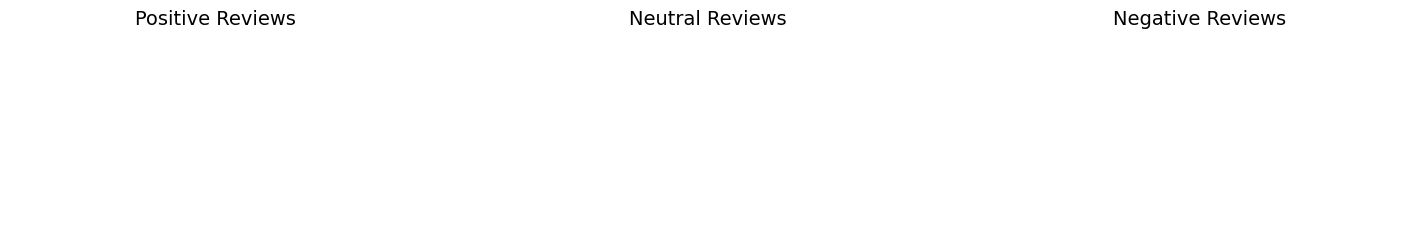

([('good', 3174), ('very', 1078), ('excellent', 300)],
 [('average', 3734)],
 [('poor', 186)])

In [23]:
#categorise reviews into positive,negative or neutral
positive_reviews = dataset[dataset["Rating text"].isin(["Excellent","Very Good", "Good"])]
neutral_reviews = dataset[dataset["Rating text"]=="Average"]
negative_reviews = dataset[dataset["Rating text"].isin(["Poor","Terrible"])]

#extract words from rating text
positive_words = " ".join(positive_reviews["Rating text"]).lower().split()
neutral_words = " ".join(neutral_reviews["Rating text"]).lower().split()
negative_words = " ".join(negative_reviews["Rating text"]).lower().split()

#get the most common words
positive_common = Counter(positive_words).most_common(10)
neutral_common = Counter(neutral_words).most_common(10)
negative_common = Counter(negative_words).most_common(10)

#generate word clouds
fig, axes = plt.subplots(1,3,figsize=(18,6))
wordcloud_positive = WordCloud(background_color="white").generate("".join(positive_words))
wordcloud_neutral = WordCloud(background_color="white").generate("".join(neutral_words))
wordcloud_negative = WordCloud(background_color="white").generate("".join(negative_words))

axes[0].imshow(wordcloud_positive, interpolation="bilinear")
axes[0].set_title("Positive Reviews", fontsize=14)
axes[0].axis("off")

axes[1].imshow(wordcloud_neutral, interpolation="bilinear")
axes[1].set_title("Neutral Reviews", fontsize=14)
axes[1].axis("off")

axes[2].imshow(wordcloud_negative, interpolation="bilinear")
axes[2].set_title("Negative Reviews", fontsize=14)
axes[2].axis("off")

plt.show()

#save the visualization
fig.savefig("wordcloud_visualization.png", dpi=300,bbox_inches='tight')


#display common words in each category
positive_common, neutral_common, negative_common

2:2 CALCULATE THE AVERAGE LENGTH OF REVIEWS AND EXPLORE IF THERE IS A RELATIONSHIP BETWEEN REVIEW LENGTH AND RATING.

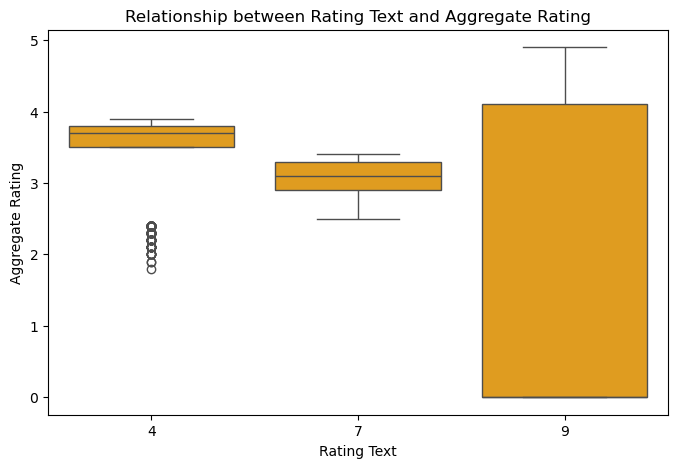

-0.47908961921650234

In [38]:
#visualize the relationship between rating text and aggregate rating
plt.figure(figsize=(8,5))
sns.boxplot(x="Rating text", y="Aggregate rating", data=dataset,color="orange")
plt.title("Relationship between Rating Text and Aggregate Rating")
plt.xlabel("Rating Text")
plt.ylabel("Aggregate Rating")
plt.show()

#calculate correlation between rating text and aggregate rating
correlation= dataset["Rating text"].corr(dataset["Aggregate rating"])

#return correlation value
correlation